In [1]:
import numpy as np
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
import import_ipynb
import distmesh
from distmesh import *

importing Jupyter notebook from distmesh.ipynb


# Question 1

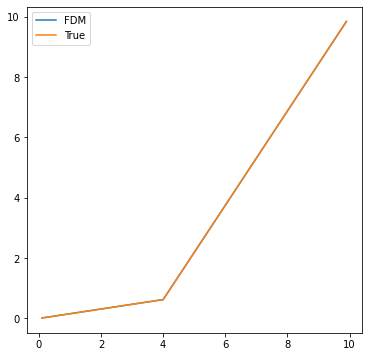

In [2]:
ua = 0
ub = 10
k1 = 10
k2 = 1
a = 0           
b = 10   
c = 4 
h = 0.1

n = int((b-a)/h)-1 
p = np.linspace(a+h, b-h, n) 

A = np.zeros((n,n))

for i in range(n):
 
    if a + (i+1)*h < c:
        
        if a + (i+1)*h == a+h:
    
            A[i,i+1] = -k1/h**2
            A[i,i] = 2*k1/h**2
        
        else:
            
            A[i,i-1] = -k1/h**2
            A[i,i+1] = -k1/h**2
            A[i,i] = 2*k1/h**2
        
    elif a + (i+1)*h > c:
        
        if a + (i+1)*h == b-h:
            
            A[i,i-1] = -k2/h**2
            A[i,i] = 2*k2/h**2
            
        else:
    
            A[i,i-1] = -k2/h**2
            A[i,i+1] = -k2/h**2
            A[i,i] = 2*k2/h**2
        
    else:
        
        A[i,i-1] = -k1/h**2
        A[i,i+1] = -k2/h**2
        A[i,i] = (k1+k2)/h**2


# Construct the RHS
z = np.zeros((n),dtype=float).reshape(n,1)
z[0] = k1*ua/h**2
z[n-1] = k2*ub/h**2

#Solve the linear system using a sparse matrix solver
As = csc_matrix(A)
zs = csc_matrix(z)
u = spsolve(As, zs).reshape(n,1)

#True solution
def true(x):
    
    if x <= c:
        
        return 5/32*x
    
    else:
        
        return -45/8 + 25/16*x
    
t = []

for i in p:
    
    t.append(true(i))
    
    
#Plot the solution
fig = plt.figure(figsize=(6, 6))
plt.plot(p,u,label="FDM")
plt.plot(p,t,label="True")
plt.legend(loc="upper left")
plt.show()

# Question 2

count =  200 displacement =  0.008139796364776469
count =  400 displacement =  0.0036413236493246523
count =  600 displacement =  0.014110173780603166


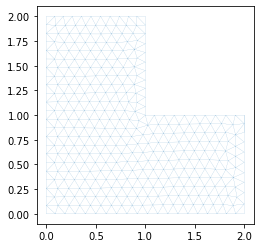

In [3]:
def fd(p):
    return ddiff(drectangle(p,0,2,0,2), drectangle(p,1,2,1,2))

pfix = [[0,0], [2,0], [2,1], [1,1], [1,2], [0,2]]
pts, tri = distmesh2D(fd, huniform, 0.1, [0, 2, 0, 2], pfix)

count =  200 displacement =  0.017135043793607013


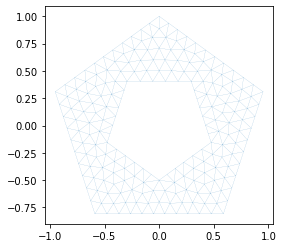

In [4]:
def dline(p,x1,y1,x2,y2):
    
    nx = y2-y1
    ny = x2-x1
    nn = np.sqrt(nx**2 + ny**2)
    return ( (y1 - p[:,1])*ny - (x1 - p[:,0])*nx )/nn

def dpentagon(p,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5):
    
    a = dline(p,x1,y1,x2,y2)
    b = dline(p,x2,y2,x3,y3)
    c = dline(p,x3,y3,x4,y4)
    d = dline(p,x4,y4,x5,y5)
    e = dline(p,x5,y5,x1,y1)
    
    return np.maximum(np.maximum(np.maximum(np.maximum(a,b),c),d),e)

#vertices computed using Sympy

v1 = [ [0,1], [-0.9510565162951546, 0.3090169943749441], [-0.5877852522924704, -0.8090169943749494], [0.5877852522924759, -0.8090169943749455], [0.9510565162951525, 0.3090169943749507]  ]
v2 = [ [0.29389262614623796, 0.4045084971874727], [-0.2938926261462352, 0.4045084971874747], [-0.4755282581475773, -0.15450849718747206], [0, -0.5], [0.47552825814757627, -0.15450849718747536] ]

def fd(p):
    
    p1 = dpentagon(p, v1[0][0], v1[0][1], v1[1][0], v1[1][1], v1[2][0], v1[2][1], v1[3][0], v1[3][1], v1[4][0], v1[4][1])
    p2 = dpentagon(p, v2[0][0], v2[0][1], v2[1][0], v2[1][1], v2[2][0], v2[2][1], v2[3][0], v2[3][1], v2[4][0], v2[4][1])
    return ddiff(p1,p2)

pfix = v1+v2
pts, tri = distmesh2D(fd, huniform, 0.1, [-1, 1, -1, 1], pfix)

count =  200 displacement =  0.002464721606719071


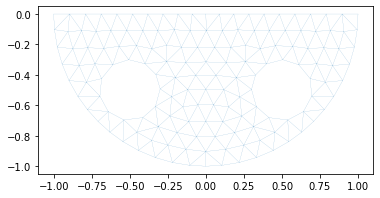

In [5]:
def dy(p):
    return p[:,1]

def fd(p):
    return ddiff(ddiff(dintersect(dcircle(p,0,0,1),dy(p)),dcircle(p,-0.5,-0.5,0.2)),dcircle(p,0.5,-0.5,0.2))
    
pfix = [[1,0], [-1,0], [0,1]]
pts, tri = distmesh2D(fd, huniform, 0.1, [-1, 1, -1, 1], pfix)